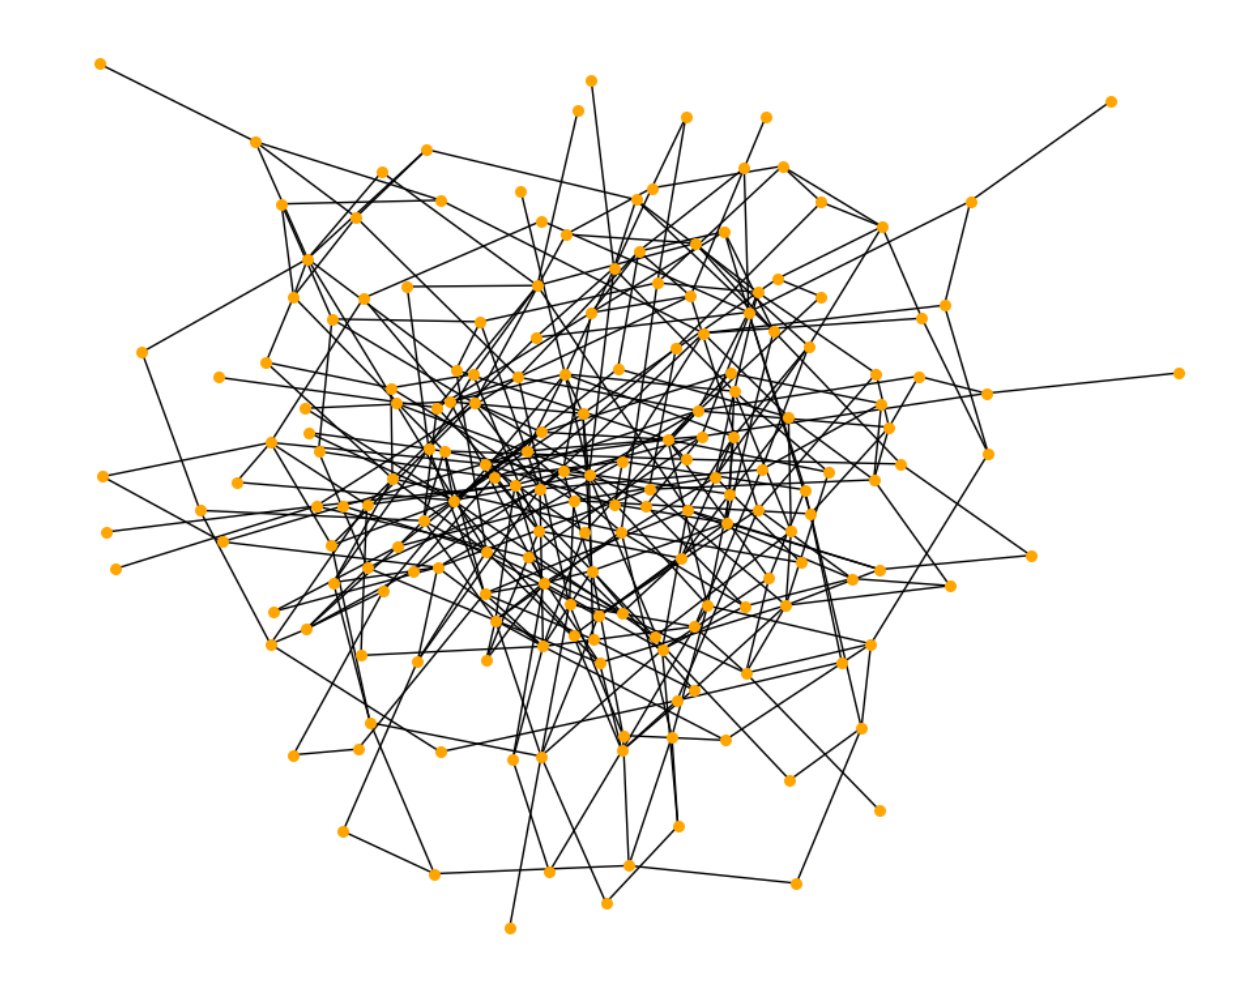

# 社会网络分析2

**主要内容**
- 规则网络
- 随机网络与小世界网络

导入基本库，并设置一些必要的参数 <p>
本章节网络分析的主要包：networkx

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# 设置 matplotlib 的字体以支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体，可根据系统情况更换
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

## 【一】规则网络的可视化

### 一、完全图（Complete Graph）  
- **定义**：图中任意两个不同节点间都有边相连，是连接最密集的网络。  
- **核心特征**：若有 $ n $ 个节点，边数为 $\frac{n(n - 1)}{2}$，每个节点的度均为 $ n - 1 $。网络连通性极强，信息可瞬间在任意节点间传播。  
- **应用场景**：常用于理论研究，或模拟需完全连接的理想系统，如加密通信的理论模型。  

### 二、星型图（Star Graph）  
- **定义**：以一个中心节点为核心，其余节点仅与中心节点相连，呈星星状。  
- **核心特征**：中心节点度为 $ n - 1 $，其他节点度为 $ 1 $。结构简单，中心节点主导信息流通。  
- **应用场景**：常见于中心辐射式系统，如轮辐式物流网络、企业以管理层为中心的沟通网络。  

### 三、格子图（Lattice Graph）  
- **定义**：节点按网格排列，与相邻节点（如上下左右）相连，典型为二维格子图。  
- **核心特征**：节点呈矩阵分布，连接规则固定。二维格子图中，内部节点度一般为 $ 4 $，边缘节点度更低，结构规整对称。  
- **应用场景**：模拟物理晶格、城市街区布局，或作为图像处理中像素连接的模型。  

### 四、环图（Cycle Graph）  
- **定义**：$ n $ 个节点依次连接成闭合环状，每个节点仅与两个相邻节点相连（首末节点相连）。  
- **核心特征**：节点数与边数均为 $ n $，节点度恒为 $ 2 $，结构高度对称，信息沿环循环传递。  
- **应用场景**：模拟环状生产线、循环通信链路，或研究对称结构下的网络传播特性。

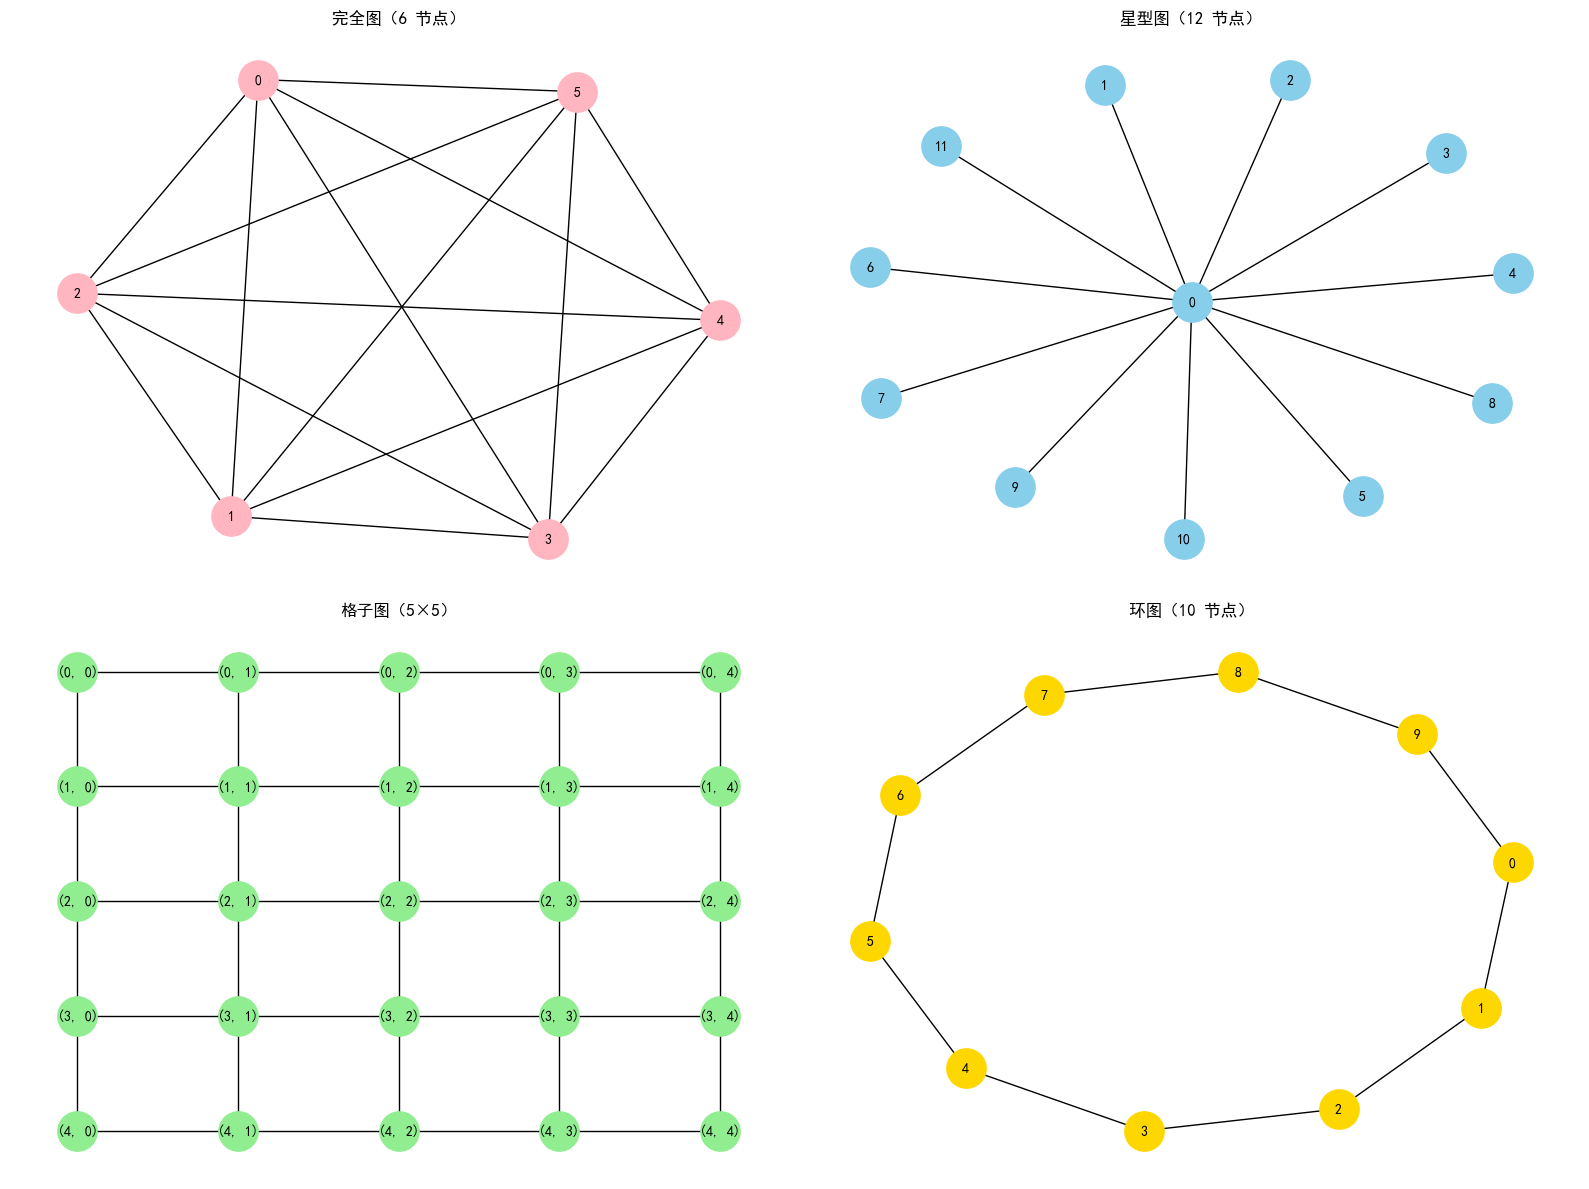

In [7]:
# 1. 完全图可视化
def plot_complete_graph(ax, n=7):
    G_complete = nx.complete_graph(n)
    nx.draw(G_complete, with_labels=True, node_color='#FFB6C1', node_size=800, 
            font_size=10, font_weight='bold', ax=ax)
    ax.set_title(f"完全图（{n} 节点）", fontsize=12)

# 2. 星型图可视化
def plot_star_graph(ax, n=20):
    G_star = nx.star_graph(n-1)
    nx.draw(G_star, with_labels=True, node_color='#87CEEB', node_size=800, 
            font_size=10, font_weight='bold', ax=ax)
    ax.set_title(f"星型图（{n} 节点）", fontsize=12)

# 3. 格子图（二维）可视化
def plot_lattice_graph(ax, m=8, n=8):
    G_lattice = nx.grid_2d_graph(m, n)
    pos = {(i, j): (j, -i) for i, j in G_lattice.nodes()}
    nx.draw(G_lattice, pos=pos, with_labels=True, node_color='#90EE90', node_size=800, 
            font_size=10, font_weight='bold', ax=ax)
    ax.set_title(f"格子图（{m}×{n}）", fontsize=12)

# 4. 环图可视化
def plot_cycle_graph(ax, n=8):
    G_cycle = nx.cycle_graph(n)
    nx.draw(G_cycle, with_labels=True, node_color='#FFD700', node_size=800, 
            font_size=10, font_weight='bold', ax=ax)
    ax.set_title(f"环图（{n} 节点）", fontsize=12)

# -------------------------------------------------------------------------------
# 调整m,n的数值，改变规则网络的大小

# 整合到一个图形
plt.figure(figsize=(16, 12))

# 完全图子图
ax1 = plt.subplot(2, 2, 1)
plot_complete_graph(ax1, n=6)

# 星型图子图
ax2 = plt.subplot(2, 2, 2)
plot_star_graph(ax2, n=12)

# 格子图子图
ax3 = plt.subplot(2, 2, 3)
plot_lattice_graph(ax3, m=5, n=5)

# 环图子图
ax4 = plt.subplot(2, 2, 4)
plot_cycle_graph(ax4, n=10)

plt.tight_layout()
plt.show()
# -------------------------------------------------------------------------------

## 【二】随机网络分析

###  G(N, L) 随机网络模型  
- **定义**：给定网络的节点数量$N$和边数量$L$，从所有可能的边组合中随机选取$L$条边连接节点，生成网络。  
- **核心特点**：边数$L$固定，通过随机组合边来构建网络。适用于已知网络总边数，探究随机连接模式下网络特性的场景，如特定规模通信网络的理论建模。  

###  G(N, p) 随机网络模型（ER 随机网络）  
- **定义**：给定节点数量$N$和边生成概率$p$，每对节点以概率$p$独立生成一条边。  
- **核心特点**：边的存在由概率$p$控制，网络稀疏或密集可通过调整$p$实现。作为经典随机网络模型，常用于研究度分布（近似泊松分布）、平均距离、集聚系数等特性，是分析网络连通性、鲁棒性的基础模型，如模拟社交网络的随机连接场景。

### 一、生成随机网络

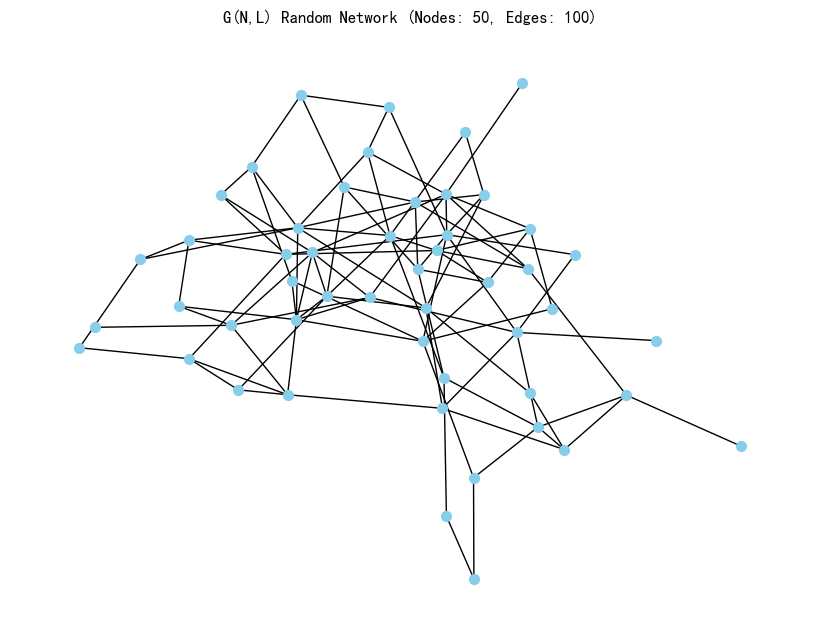

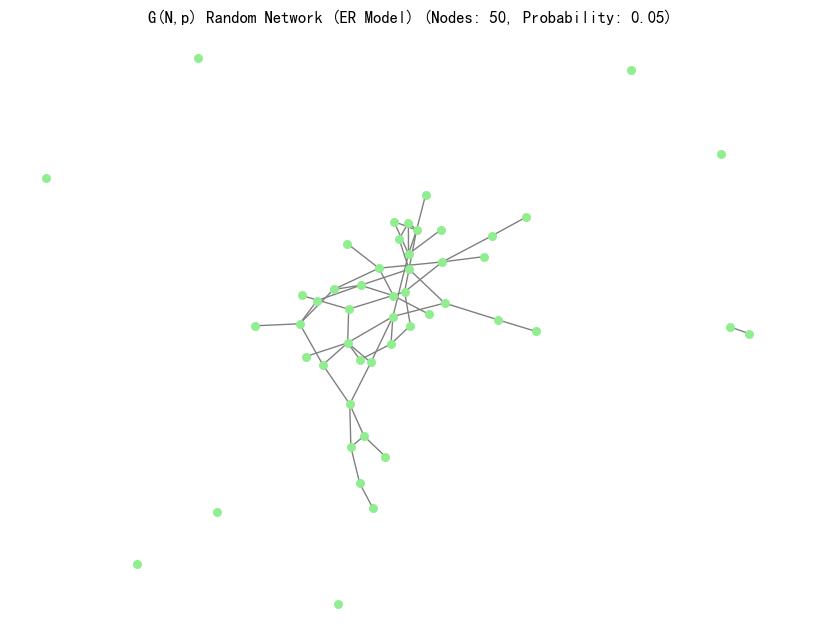

In [8]:
def visualize_gnl_network(num_nodes, num_edges):
    """
    可视化 G(N,L) 随机网络
    :param num_nodes: 网络中的节点数量
    :param num_edges: 网络中的边数量
    """
    G_nl = nx.gnm_random_graph(num_nodes, num_edges)
    plt.figure(figsize=(8, 6))
    nx.draw(G_nl, with_labels=False, node_color='skyblue', node_size=50)
    plt.title(f"G(N,L) Random Network (Nodes: {num_nodes}, Edges: {num_edges})")
    plt.show()


def visualize_gnp_network(num_nodes, edge_probability):
    """
    可视化 G(N,p) 随机网络（ER 随机网络）
    :param num_nodes: 网络中的节点数量
    :param edge_probability: 每条边出现的概率
    """
    G_np = nx.erdos_renyi_graph(num_nodes, edge_probability)
    plt.figure(figsize=(8, 6))
    nx.draw(G_np, with_labels=False, node_color='lightgreen', node_size=30, edge_color='gray')
    plt.title(f"G(N,p) Random Network (ER Model) (Nodes: {num_nodes}, Probability: {edge_probability})")
    plt.show()

# -----------------------------------------------------------------------
# 调整你想生成的网络的参数
visualize_gnl_network(num_nodes= 50, num_edges = 100)
visualize_gnp_network(num_nodes= 50, edge_probability = 0.05)
# -----------------------------------------------------------------------

---
接下来，我们将研究**随机网络平均度与巨连通分支**的关系 <br>
巨连同分支指的是在一个网络（图）中，规模最大的连通子图

**亚临界状态**: 平均度小于1，无巨连通分支

平均度为：0.5


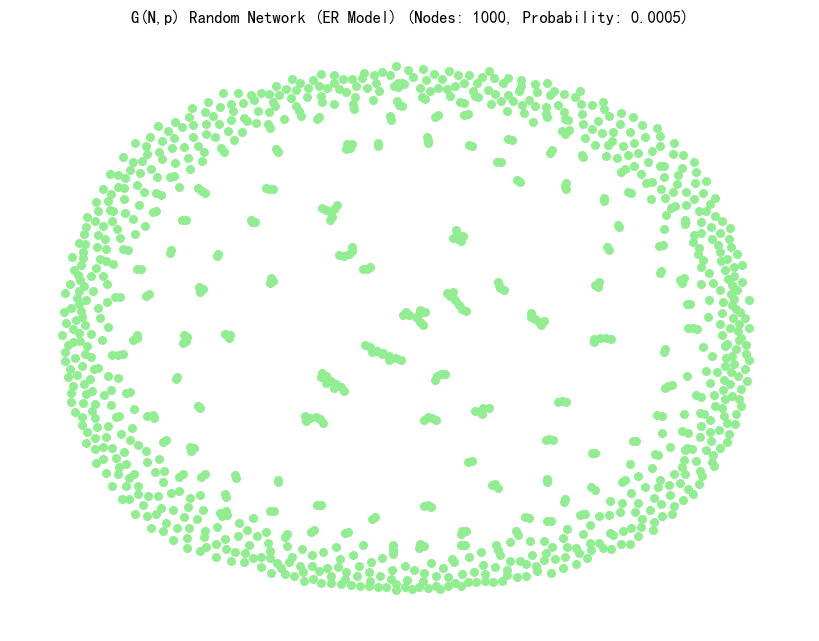

In [9]:
num_nodes= 1000
edge_probability = 0.0005
print(f"平均度为：{num_nodes * edge_probability}")

visualize_gnp_network(num_nodes, edge_probability)

**临界点**： 平均度为1，巨连通分支开始出现

平均度为：1.0


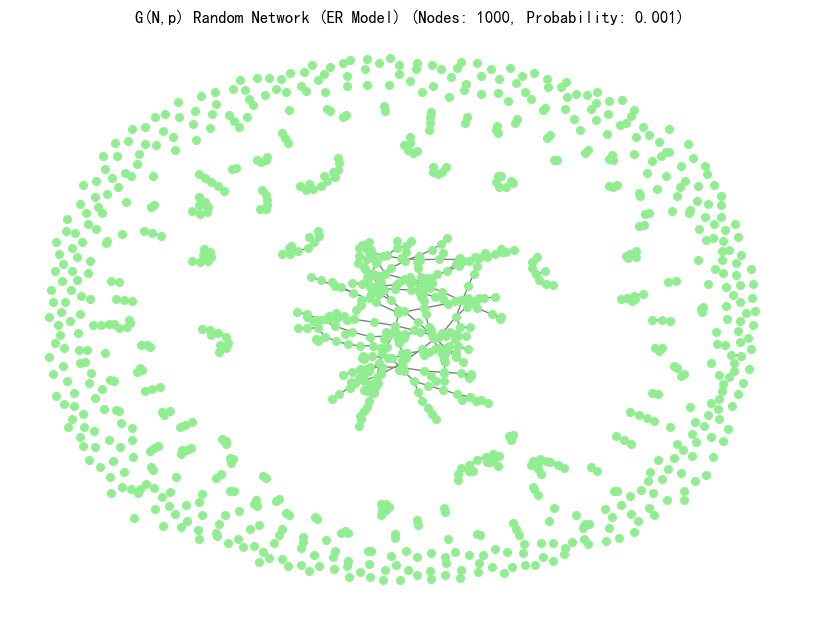

In [10]:
num_nodes= 1000
edge_probability = 0.001
print(f"平均度为：{num_nodes * edge_probability}")

visualize_gnp_network(num_nodes, edge_probability)

**超临界状态**： 平均度大于1

平均度为：2.0


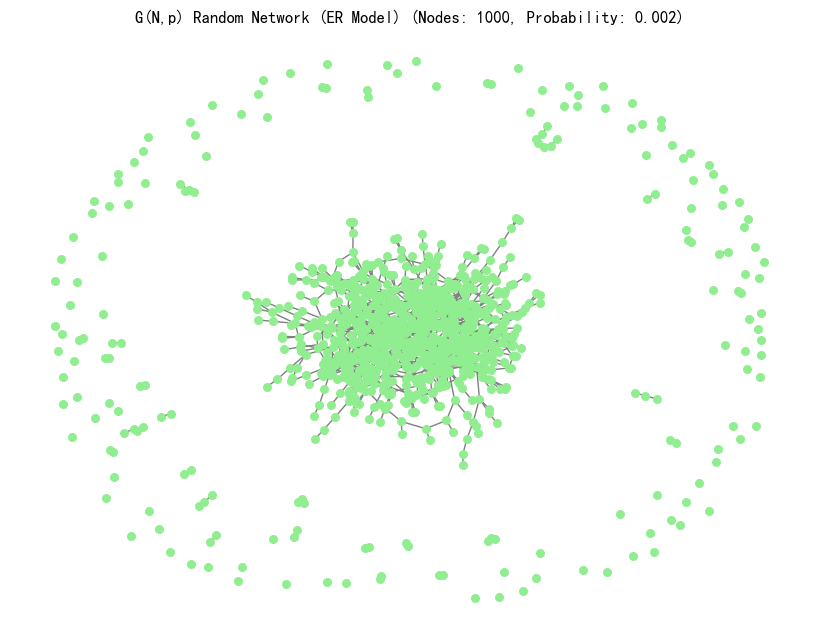

In [11]:
num_nodes= 1000
edge_probability = 0.002
print(f"平均度为：{num_nodes * edge_probability}")

visualize_gnp_network(num_nodes, edge_probability)

**全连通状态**: $\langle k \rangle > \ln N$ 

lnN: 6.907755278982137
平均度为：8.0


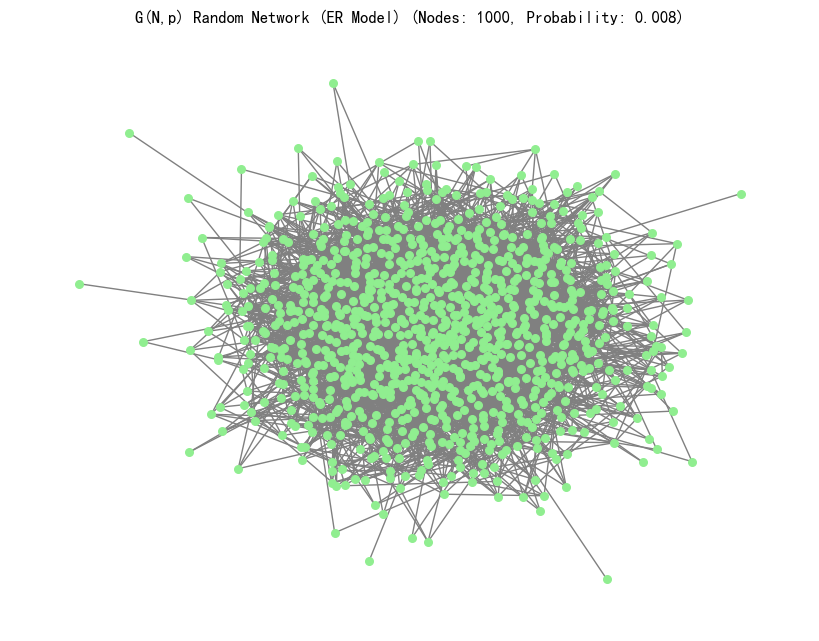

In [12]:
num_nodes= 1000
edge_probability = 0.008
print('lnN:',np.log(num_nodes))
print(f"平均度为：{num_nodes * edge_probability}")

visualize_gnp_network(num_nodes, edge_probability)

###  二、绘制不同规模随机网络的度分布

ER 随机网络（G (N,p) 模型）的度分布服从**泊松分布**，节点的度 $k$ 的概率为：
$$P(k) = \frac{(np)^k}{k!} e^{-np}$$
其中，$np$ 是网络的平均度（假设 $p$ 固定，$n$ 为节点数）。<br>
当边概率 $p$ 固定时，平均度 $\langle k \rangle = p(n-1) \approx pn$，随网络规模 $n$ 线性增长。

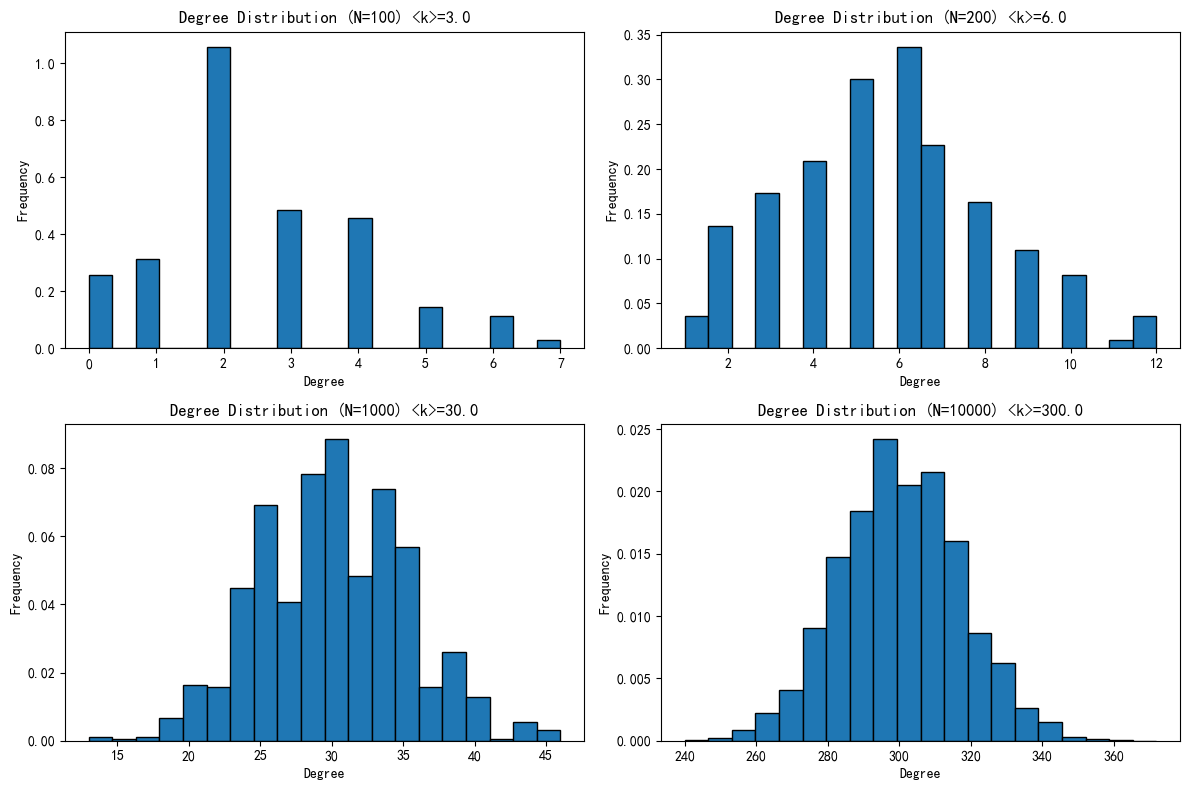

In [13]:
def plot_degree_distribution(sizes=None, edge_prob=0.001):
    """
    绘制不同规模随机网络的度分布
    :param sizes: 节点规模列表，默认为 [50, 100, 200]
    :param edge_prob: 边的概率，默认为 0.03
    """
    if sizes is None:
        sizes = [50, 100, 200]
    try:
        plt.figure(figsize=(12, 8))
        for i, n in enumerate(sizes):
            # 创建 ER 随机网络
            G = nx.erdos_renyi_graph(n, edge_prob)
            # 获取节点的度
            degrees = [d for _, d in G.degree()]
            # 创建子图
            plt.subplot(2, 2, i + 1)
            # 绘制度分布直方图
            plt.hist(degrees, bins=20, density=True, edgecolor='black')
            plt.title(f"Degree Distribution (N={n}) <k>={n * edge_prob}")
            plt.xlabel("Degree")
            plt.ylabel("Frequency")
        # 调整子图布局
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"绘制度分布时出现错误: {e}")

# ------------------------------------------------------------- 
#  运行函数，可调整参数
list_range = [100, 200, 1000, 10000]
plot_degree_distribution(sizes=list_range, edge_prob=0.03)
# -------------------------------------------------------------   

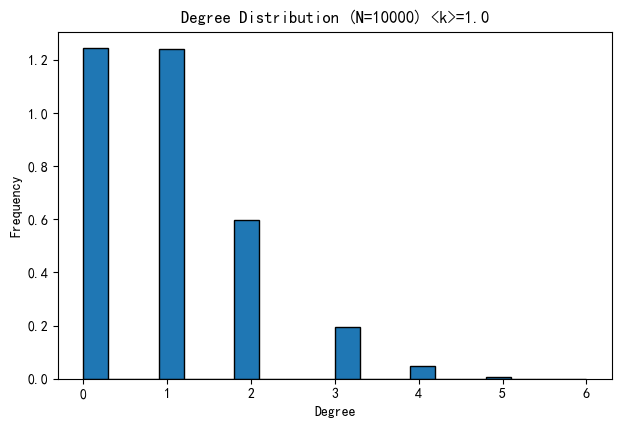

In [14]:
# ------------------------------------------------------------- 
#  运行函数，可调整参数
list_range = [10000]
plot_degree_distribution(sizes=list_range, edge_prob=0.0001)
# -------------------------------------------------------------   

###  三、ER随机网络的平均距离、集聚系数与网络规模的关系

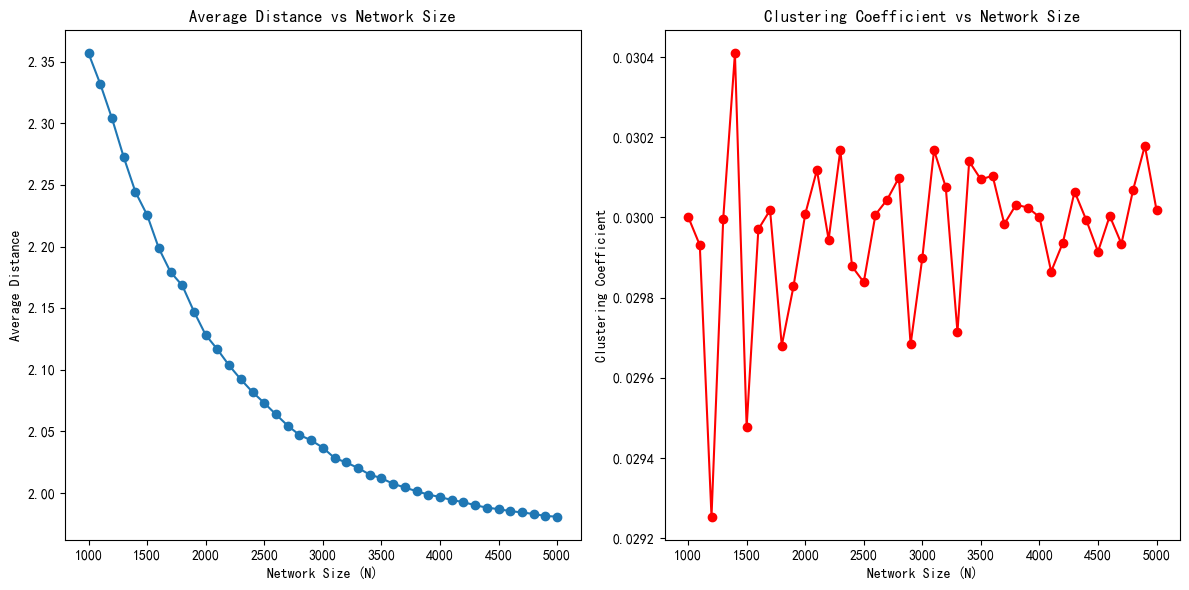

In [15]:
# ------------------------------------------------------------- 
#  调整你想模拟的参数

# 设置网络规模：初始值，最终值（取不到），步长
ns = np.arange(1000, 5001, 100)
# 网络连边的概率
prob = 0.001
# ------------------------------------------------------------- 


avg_distances = []
clustering_coeffs = []

for n in ns:
    G = nx.erdos_renyi_graph(n, 0.03)
    # 检查图是否连通，如果不连通则取最大连通分量
    if not nx.is_connected(G):
        largest_cc = max(nx.connected_components(G), key=len)
        G = G.subgraph(largest_cc).copy()
    
    avg_distances.append(nx.average_shortest_path_length(G))
    clustering_coeffs.append(nx.average_clustering(G))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(ns, avg_distances, marker='o')
plt.title("Average Distance vs Network Size")
plt.xlabel("Network Size (N)")
plt.ylabel("Average Distance")

plt.subplot(1, 2, 2)
plt.plot(ns, clustering_coeffs, marker='o', color='r')
plt.title("Clustering Coefficient vs Network Size")
plt.xlabel("Network Size (N)")
plt.ylabel("Clustering Coefficient")
plt.tight_layout()
plt.show()

###  四、可视化ER随机网络的巨连通分量

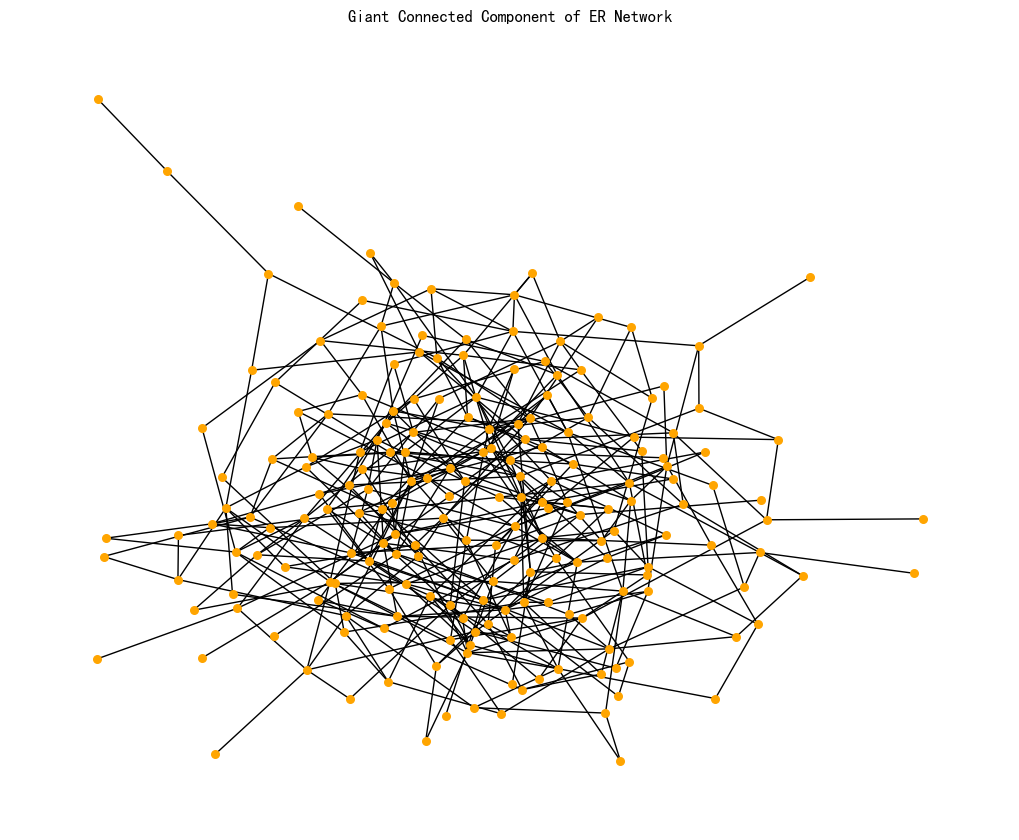

In [16]:
G = nx.erdos_renyi_graph(200, 0.02)
giant = max(nx.connected_components(G), key=len)
G_giant = G.subgraph(giant)

plt.figure(figsize=(10, 8))
nx.draw(G_giant, with_labels=False, node_color='orange', node_size=30)
plt.title("Giant Connected Component of ER Network")
plt.show()

**真实网络是随机的吗？**
**或言之，随机网络能刻画真实网络吗？**
* 真实系统中，大度节点的数量要比随机网络模型预测的多得多。且真实网络的度分布的峰值会更早出现；
* 很多不满足随机网络据巨连通分支条件的真实网络，不包含孤立的小连通分支；
* 随机网络里节点的局部集聚系数与节点的度无关，反比于网络大小。但真实网络里的局部集聚系数随着节点的度增大而减小，且与网络大小基本无关。

**但是，随机网络能够解释小世界现象**

## 【三】小世界网络

**一个小世界网络具有两个特性：**
* 高集聚性：邻居节点大概率链接
* 短平均距离

**在《巴拉巴西网络科学》里，小世界性质定义为：**
$$ \langle d \rangle \approx \frac {\ln N} {\ln \langle k \rangle} $$

In [17]:
# --------------------------------------
num_nodes = 10000
edge_probability = 0.005
# --------------------------------------
G_np = nx.erdos_renyi_graph(num_nodes, edge_probability)
average_shortest_path_length = nx.average_shortest_path_length(G_np)

print(f'小世界的平均直径：{np.log(num_nodes)/np.log(num_nodes * edge_probability)}')
print(f'生成的随机网络的平均直径：{average_shortest_path_length}')  

小世界的平均直径：2.354367640271116
生成的随机网络的平均直径：2.7701002700270028



#### NW 小世界网络与 WS 小世界网络介绍


| **特性**         | **WS 模型**                          | **NW 模型**                          |
|------------------|--------------------------------------|--------------------------------------|
| **初始规则网络** |  从一个环形规则网络开始         |  从一个环形规则网络开始   |
| **随机性引入方式** | 随机重连边                           | 随机添加新边                         |
| **集聚系数**      | 随 \( p \) 增加缓慢下降               | 随 \( p \) 增加下降幅度更小           |
| **平均路径长度**  | 随 \( p \) 增加快速下降               | 随 \( p \) 增加快速下降               |
| **度分布**        | 接近泊松分布                         | 接近泊松分布，可能存在更多高度数节点 |
| **局部结构保留**  | 部分破坏（重连边可能切断原有连接）   | 更好保留（仅新增边不影响原有连接）   |


In [18]:
# --------------------
#    函数设定
# --------------------
# 生成并可视化 WS 小世界网络
def visualize_ws_network(n=20, k=4, p=0.1):
    ws_graph = nx.watts_strogatz_graph(n, k, p)
    visualize_graph(ws_graph, f"WS 小世界网络 (n={n}, k={k}, p={p})", node_color='skyblue')
    analyze_network(ws_graph, "WS 小世界网络")


# 生成并可视化 NW 小世界网络
def visualize_nw_network(n=20, k=4, p=0.1):
    nw_graph = nx.newman_watts_strogatz_graph(n, k, p)
    visualize_graph(nw_graph, f"NW 小世界网络 (n={n}, k={k}, p={p})", node_color='lightgreen')
    analyze_network(nw_graph, "NW 小世界网络")


# 统一的可视化函数
def visualize_graph(graph, title, node_color):
    plt.figure(figsize=(8, 6))
    # 计算节点位置
    pos = nx.spring_layout(graph)
    nx.draw(
    graph, pos,
    with_labels=False,
    node_size=10,          # 增大节点大小
    node_color='#64B5F6',  # 更鲜明的节点颜色（浅蓝色）
    edge_color='gray',
    width=0.4              # 调整边的粗细
    )
    # 设置标题
    plt.title(title)
    # 去除坐标轴
    plt.axis('off')
    plt.show()


# 分析网络的度分布、平均距离和集聚系数
def analyze_network(graph, network_type):
    # 度分布
    degrees = [d for _, d in graph.degree()]
    plt.figure(figsize=(8, 6))
    plt.hist(degrees, bins=20, density=True, edgecolor='black')
    plt.title(f"{network_type} 度分布")
    plt.xlabel("度")
    plt.ylabel("频率")
    plt.show()

    # 平均距离
    try:
        avg_distance = nx.average_shortest_path_length(graph)
        print(f"{network_type} 平均距离: {avg_distance}")
    except nx.NetworkXError:
        print(f"{network_type} 非连通，无法计算平均距离。")

    # 集聚系数
    clustering_coeff = nx.average_clustering(graph)
    print(f"{network_type} 集聚系数: {clustering_coeff}")


**可视化小世界网络**

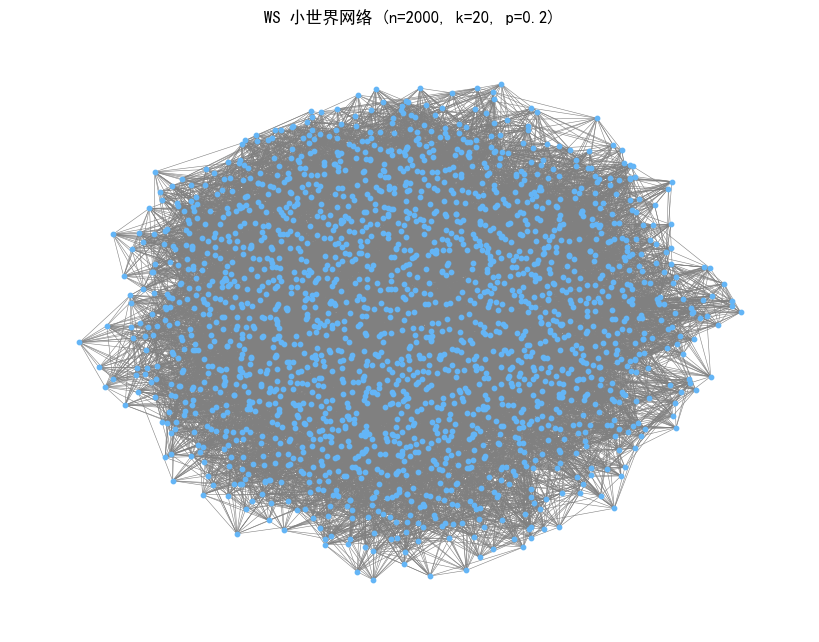

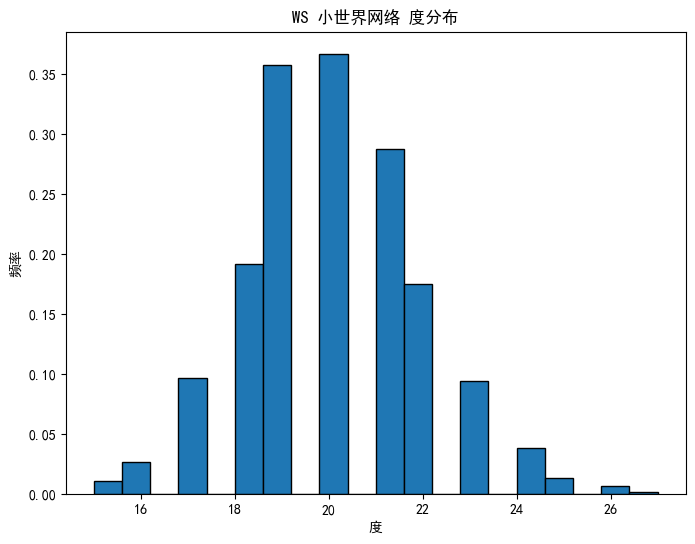

WS 小世界网络 平均距离: 3.245026013006503
WS 小世界网络 集聚系数: 0.37026904771391345


In [19]:
# ------------------------------
# 定义WS小世界网络的参数
n = 2000  # 节点数量
k = 20   # 每个节点的初始邻居数量
p = 0.2 # 重连概率
# ------------------------------

# 可视化WS小世界网络
visualize_ws_network(n, k, p)

**WS小世界网络可视化**

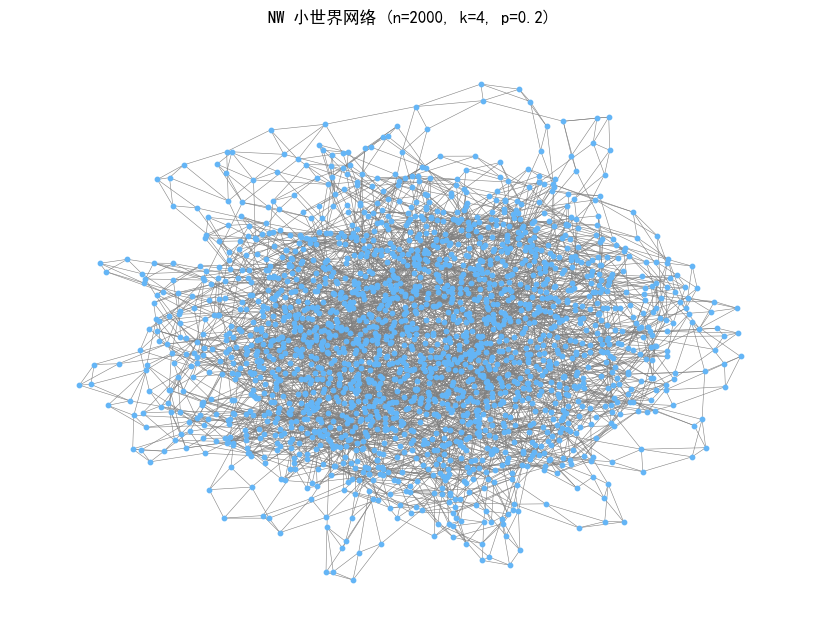

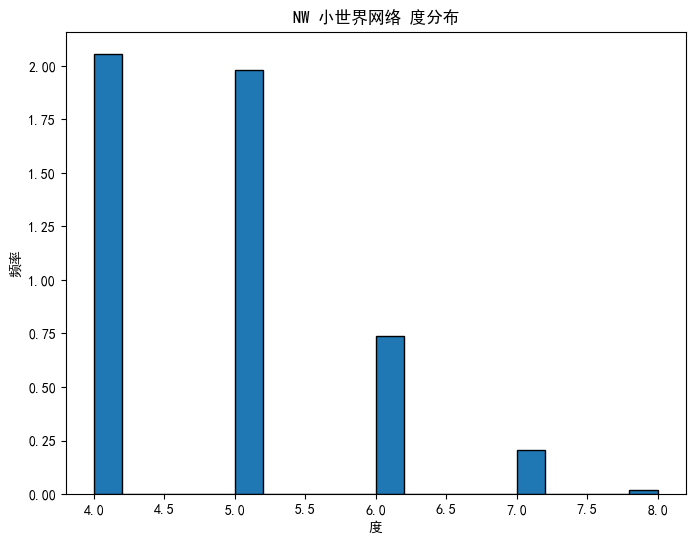

NW 小世界网络 平均距离: 6.85232216108054
NW 小世界网络 集聚系数: 0.36104285714285717


In [20]:
# ------------------------------
# 定义WS小世界网络的参数
n = 2000  # 节点数量
k = 4   # 每个节点的初始邻居数量
p = 0.2 # 随机添加边的概率
# ------------------------------

# 可视化WS小世界网络
visualize_nw_network(n,k,p)